# <center>Time Series</center>

**Time Series** in pandas which leverage the datetime data type to extract date components,group by dates and perform calculation like moving average


## The datetime datatype

In [1]:
from datetime import datetime
now =datetime.now()
now

datetime.datetime(2025, 3, 21, 16, 43, 8, 311522)

In [2]:
type(now)

datetime.datetime

In [3]:
import pandas as pd
import numpy as np

In [4]:
dates = pd.read_csv("retail_2016_2017.csv")

In [5]:
dates

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.000,0
1,1945945,2016-01-01,1,BABY CARE,0.000,0
2,1945946,2016-01-01,1,BEAUTY,0.000,0
3,1945947,2016-01-01,1,BEVERAGES,0.000,0
4,1945948,2016-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
1054939,3000883,2017-08-15,9,POULTRY,438.133,0
1054940,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
1054941,3000885,2017-08-15,9,PRODUCE,2419.729,148
1054942,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [6]:
date_table = dates[["date","sales"]]

In [7]:
date_table

,date,sales
0,2016-01-01,0.000
1,2016-01-01,0.000
2,2016-01-01,0.000
3,2016-01-01,0.000
4,2016-01-01,0.000
...,...,...
1054939,2017-08-15,438.133
1054940,2017-08-15,154.553
1054941,2017-08-15,2419.729
1054942,2017-08-15,121.000


In [8]:
date_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   date    1054944 non-null  object 
 1   sales   1054944 non-null  float64
dtypes: float64(1), object(1)
memory usage: 16.1+ MB


In [9]:
half = 1054944/2
half

527472.0

In [10]:
#to understand the concept of time series we are splitting the dataframe into two 
#frames and fill some two null values in the rows

first_sales = date_table.iloc[0:527472]


In [11]:
second_sales = date_table.iloc[527472:1054944]

In [12]:
first_sales.head()

,date,sales
0,2016-01-01,0.0
1,2016-01-01,0.0
2,2016-01-01,0.0
3,2016-01-01,0.0
4,2016-01-01,0.0


In [13]:
second_sales.head()

,date,sales
527472,2016-10-23,0.0
527473,2016-10-23,0.0
527474,2016-10-23,3.0
527475,2016-10-23,1106.0
527476,2016-10-23,0.0


In [14]:
first_sales["date"].iloc[2] =np.nan

C:\Users\Nandhini\AppData\Local\Temp\ipykernel_12256\2665446747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_sales["date"].iloc[2] =np.nan


In [15]:
first_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527472 entries, 0 to 527471
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    527471 non-null  object 
 1   sales   527472 non-null  float64
dtypes: float64(1), object(1)
memory usage: 8.0+ MB


In [16]:
first_sales

,date,sales
0,2016-01-01,0.000
1,2016-01-01,0.000
2,NaN,0.000
3,2016-01-01,0.000
4,2016-01-01,0.000
...,...,...
527467,2016-10-22,544.287
527468,2016-10-22,116.352
527469,2016-10-22,1537.244
527470,2016-10-22,1.000


In [17]:
#first_sales and second_sales dataframe have date column as a object datatype.
#to convert the object datatype of date column to datatime datatype 
#use .to_datetime(),.astype() 

first_sales.astype({"date":"datetime64"})

,date,sales
0,2016-01-01,0.000
1,2016-01-01,0.000
2,NaT,0.000
3,2016-01-01,0.000
4,2016-01-01,0.000
...,...,...
527467,2016-10-22,544.287
527468,2016-10-22,116.352
527469,2016-10-22,1537.244
527470,2016-10-22,1.000


In [18]:
first_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527472 entries, 0 to 527471
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    527471 non-null  object 
 1   sales   527472 non-null  float64
dtypes: float64(1), object(1)
memory usage: 8.0+ MB


In [19]:
first_sales.astype({"date":"datetime64"},errors="ignore")

,date,sales
0,2016-01-01,0.000
1,2016-01-01,0.000
2,NaT,0.000
3,2016-01-01,0.000
4,2016-01-01,0.000
...,...,...
527467,2016-10-22,544.287
527468,2016-10-22,116.352
527469,2016-10-22,1537.244
527470,2016-10-22,1.000


In [20]:
first_sales.dtypes

date      object
sales    float64
dtype: object

### The .to_datetime() function is more flexible option for converting datetimes

In [21]:
#this will convert the object datatype to datatime datatype even there is a errors
first_sales["date"] = pd.to_datetime(first_sales["date"],errors="coerce",infer_datetime_format =True)

C:\Users\Nandhini\AppData\Local\Temp\ipykernel_12256\1303797559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_sales["date"] = pd.to_datetime(first_sales["date"],errors="coerce",infer_datetime_format =True)


In [22]:
first_sales.dtypes

date     datetime64[ns]
sales           float64
dtype: object

In [23]:
first_sales.head() #NaT stands for not a time

,date,sales
0,2016-01-01,0.0
1,2016-01-01,0.0
2,NaT,0.0
3,2016-01-01,0.0
4,2016-01-01,0.0


### Format date and extract date components using datatime codes

In [24]:
now

datetime.datetime(2025, 3, 21, 16, 43, 8, 311522)

In [25]:
now.strftime("%B %d,%Y") # its a string

'March 21,2025'

In [26]:
#the .dt accessor let you use .strftime() on datetime in pandas dataframe
first_sales["sales"].iloc[2]=0.0

C:\Users\Nandhini\AppData\Local\Temp\ipykernel_12256\4244722112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_sales["sales"].iloc[2]=0.0


In [27]:
first_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527472 entries, 0 to 527471
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    527471 non-null  datetime64[ns]
 1   sales   527472 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 MB


In [28]:
first_sales.assign(date = first_sales["date"].dt.strftime("%Y-%B-%a"))#you can specify multiple datatime codes 
                                                                        #and punctuation to create custom format

,date,sales
0,2016-January-Fri,0.000
1,2016-January-Fri,0.000
2,NaN,0.000
3,2016-January-Fri,0.000
4,2016-January-Fri,0.000
...,...,...
527467,2016-October-Sat,544.287
527468,2016-October-Sat,116.352
527469,2016-October-Sat,1537.244
527470,2016-October-Sat,1.000


In [29]:
first_sales["date"].dt.strftime("%Y").head()
first_sales["date"].dt.strftime("%y-%b-%d").head()

0    16-Jan-01
1    16-Jan-01
2          NaN
3    16-Jan-01
4    16-Jan-01
Name: date, dtype: object

In [30]:
#it is preferred to use the dedicated .dt accessors to extract datatime components
first_sales["date"].dt.year

0         2016.0
1         2016.0
2            NaN
3         2016.0
4         2016.0
           ...  
527467    2016.0
527468    2016.0
527469    2016.0
527470    2016.0
527471    2016.0
Name: date, Length: 527472, dtype: float64

In [31]:
first_sales["date"].dt.month
first_sales["date"].dt.dayofweek.head()

0    4.0
1    4.0
2    NaN
3    4.0
4    4.0
Name: date, dtype: float64

In [32]:
first_sales.head()

,date,sales
0,2016-01-01,0.0
1,2016-01-01,0.0
2,NaT,0.0
3,2016-01-01,0.0
4,2016-01-01,0.0


In [33]:
#create a column for year,quarter, day_of_week from the column date
first_sales = first_sales.assign(year = first_sales["date"].dt.year,
                                quarter = first_sales["date"].dt.quarter,
                                day_of_week = first_sales["date"].dt.dayofweek)

In [34]:
first_sales.head()

,date,sales,year,quarter,day_of_week
0,2016-01-01,0.0,2016.0,1.0,4.0
1,2016-01-01,0.0,2016.0,1.0,4.0
2,NaT,0.0,NaN,NaN,NaN
3,2016-01-01,0.0,2016.0,1.0,4.0
4,2016-01-01,0.0,2016.0,1.0,4.0


### **Time deltas** represent the amount or time,or the difference between two datetimes
Time delta is returned when subtracting two datetime values.


In [35]:
age_df =pd.DataFrame().assign(born_year = first_sales["date"],current_year = pd.to_datetime("2025-03-25"))

In [36]:
age_df.head()

,born_year,current_year
0,2016-01-01,2025-03-25
1,2016-01-01,2025-03-25
2,NaT,2025-03-25
3,2016-01-01,2025-03-25
4,2016-01-01,2025-03-25


In [37]:
age_df = age_df.assign(age =(age_df["current_year"] - age_df["born_year"]).dt.days/365.25)

In [38]:
age_df.head()

,born_year,current_year,age
0,2016-01-01,2025-03-25,9.229295
1,2016-01-01,2025-03-25,9.229295
2,NaT,2025-03-25,NaN
3,2016-01-01,2025-03-25,9.229295
4,2016-01-01,2025-03-25,9.229295


### Use datetime as the index to allow for intutive slicing of you dataframe

In [39]:
second_sales["date"] =pd.to_datetime(second_sales["date"])

C:\Users\Nandhini\AppData\Local\Temp\ipykernel_12256\2958813432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_sales["date"] =pd.to_datetime(second_sales["date"])


In [40]:

second_sales.loc[second_sales["date"].dt.year==2016]

,date,sales
527472,2016-10-23,0.000
527473,2016-10-23,0.000
527474,2016-10-23,3.000
527475,2016-10-23,1106.000
527476,2016-10-23,0.000
...,...,...
650425,2016-12-31,687.853
650426,2016-12-31,100.405
650427,2016-12-31,3091.356
650428,2016-12-31,2.000


In [41]:
second_sales.set_index("date")

,sales
date,
2016-10-23,0.000
2016-10-23,0.000
2016-10-23,3.000
2016-10-23,1106.000
2016-10-23,0.000
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


In [42]:
second_sales.set_index("date").loc["2016"]

,sales
date,
2016-10-23,0.000
2016-10-23,0.000
2016-10-23,3.000
2016-10-23,1106.000
2016-10-23,0.000
...,...
2016-12-31,687.853
2016-12-31,100.405
2016-12-31,3091.356


In [43]:
second_sales.head()

,date,sales
527472,2016-10-23,0.0
527473,2016-10-23,0.0
527474,2016-10-23,3.0
527475,2016-10-23,1106.0
527476,2016-10-23,0.0


In [44]:
second_sales.set_index("date").loc["2017":"2019"]

,sales
date,
2017-01-01,0.000
2017-01-01,0.000
2017-01-01,0.000
2017-01-01,0.000
2017-01-01,0.000
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


In [45]:
second_sales.set_index("date").loc["2017-02":"2018-02"]

,sales
date,
2017-02-01,7.000
2017-02-01,0.000
2017-02-01,7.000
2017-02-01,2399.000
2017-02-01,1.000
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


### Time series data allows for methods for fixing missing data beyond .fillna()

In [46]:
sales_2017 = second_sales.set_index("date").loc["2017"]

In [47]:
sales_2017["sales"].mean()

480.12446633063644

In [48]:
everyday_sales_2017 = sales_2017.groupby("date").agg("mean").round(2)

In [62]:
everyday_sales_2017.loc["2017-01-02"] =np.NaN
everyday_sales_2017.loc["2017-01-06"] =np.NaN
everyday_sales_2017.loc["2017-01-08"] =np.NaN

In [66]:
#dataset for practising missing time series data
sales_agg = everyday_sales_2017.iloc[:10]

In [67]:
#.ffill(),.bfill()
sales_agg


,sales
date,
2017-01-01,6.78
2017-01-02,NaN
2017-01-03,619.74
2017-01-04,555.61
2017-01-05,436.38
2017-01-06,NaN
2017-01-07,619.42
2017-01-08,NaN
2017-01-09,445.41


<Axes: xlabel='date'>

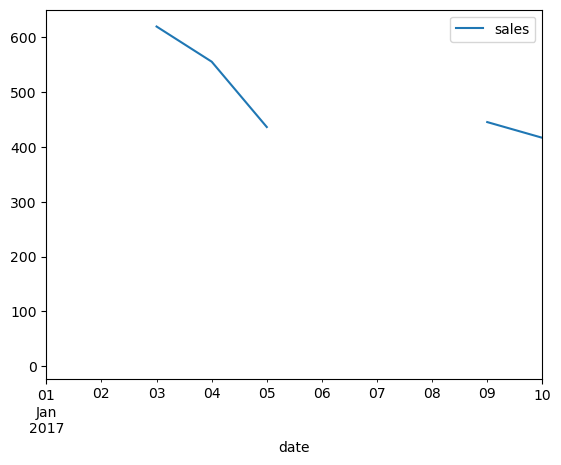

In [68]:
sales_agg.plot()

<Axes: xlabel='date'>

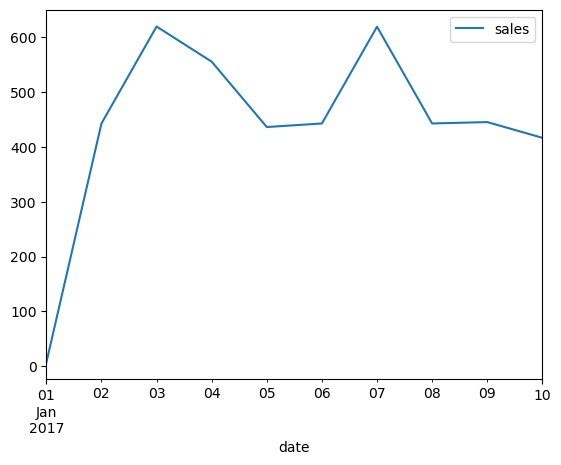

In [71]:
sales_agg.fillna(sales_agg["sales"].mean()).plot()

<Axes: xlabel='date'>

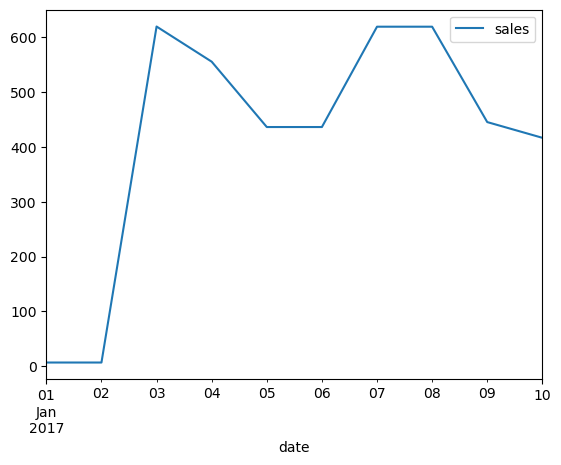

In [72]:
sales_agg.ffill().plot()

### You can shift a series by a specified number of rows using .shift() method
This is helpful when working with time series to compare values against previous periods.


In [78]:
sales_agg =sales_agg.ffill()

In [83]:
sales_agg.assign(yesterday_sales = sales_agg["sales"].shift(),difference =sales_agg["sales"].diff())

,sales,yesterday_sales,difference
date,,,
2017-01-01,6.78,NaN,NaN
2017-01-02,6.78,6.78,0.00
2017-01-03,619.74,6.78,612.96
2017-01-04,555.61,619.74,-64.13
2017-01-05,436.38,555.61,-119.23
2017-01-06,436.38,436.38,0.00
2017-01-07,619.42,436.38,183.04
2017-01-08,619.42,619.42,0.00
2017-01-09,445.41,619.42,-174.01


### Aggregating time series using the .groupby() method 

In [107]:
second_sales = second_sales.reset_index()

In [109]:
second_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527472 entries, 0 to 527471
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    527472 non-null  datetime64[ns]
 1   sales   527472 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 MB


In [112]:
#calculate the total sales by month regardless of the year
second_sales.groupby(second_sales["date"].dt.month).agg({"sales":"sum"}).round()

,sales
date,
1,26328160.0
2,23250112.0
3,26704018.0
4,25895308.0
5,26911847.0
6,25682822.0
7,27011478.0
8,12433323.0
10,6569502.0


In [114]:
#similarly calculate the total sales by year

second_sales.groupby(second_sales["date"].dt.year).agg({"sales":"sum"}).round()

,sales
date,
2016,60852430.0
2017,194217068.0


In [123]:
second_sales.set_index("date").head(10)

,sales
date,
2016-10-23,0.00000
2016-10-23,0.00000
2016-10-23,3.00000
2016-10-23,1106.00000
2016-10-23,0.00000
2016-10-23,201.45801
2016-10-23,9.00000
2016-10-23,301.00000
2016-10-23,401.00000


In [126]:
retail_daily = second_sales.set_index("date").resample("D").sum().round()#groupby everyday sale using resample()method.

In [127]:
retail_daily

,sales
date,
2016-10-23,1022954.0
2016-10-24,668508.0
2016-10-25,610591.0
2016-10-26,633414.0
2016-10-27,544361.0
...,...
2017-08-11,826374.0
2017-08-12,792631.0
2017-08-13,865640.0


<Axes: xlabel='date'>

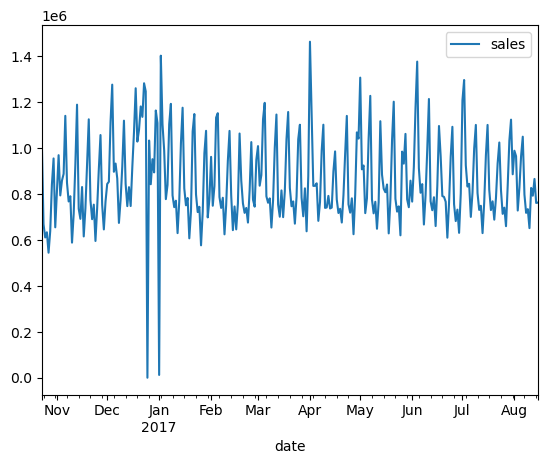

In [128]:
retail_daily.plot()

<Axes: xlabel='date'>

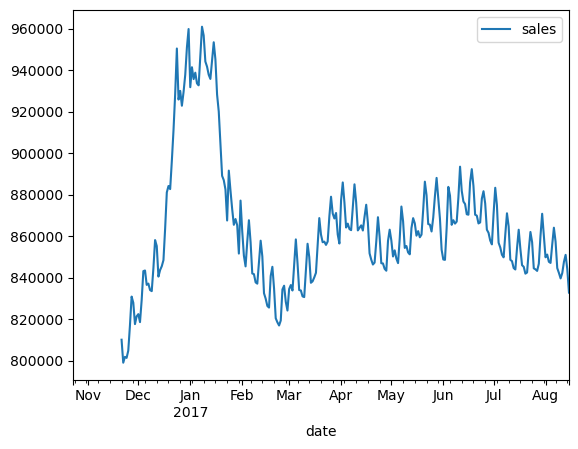

In [133]:
retail_daily.rolling(30).mean().plot()#rolling aggregation